# Importing the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas.plotting import scatter_matrix

# Fetching the data

In [ ]:
breast_cancer_data = load_breast_cancer()

In [ ]:
X = breast_cancer_data.data
y = breast_cancer_data.target

# Cleaning the dataset

In [ ]:
# Reading the DataFrame, first using the feature data
df = pd.DataFrame(X, columns=breast_cancer_data.feature_names)

# Adding a target column, and filling it with the target data
df['target'] = y

# Showing the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Getting the dimensions of the data
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 31)


In [ ]:
# Checking missing or null data points
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

* There exists no NULL values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

* One of the important observation that we can make out of the above table is that the input data has no missing values, all the columns have 569 values each. All the input data type is a float data type with the target variable being integer data type. 

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


* From the above statistical table we can observe that the max value of 'mean area' attribute is 2501 whereas the max value of 'smoothness' atribute is 0.1634. 
* Clearly the huge difference in the scales of the attributes is evident.
* Thus we'll use standardization to bring the scales of the attributes to the comparable scales.

In [ ]:
df['target'].value_counts()
# 0 - malignant
# 1 - benign

1    357
0    212
Name: target, dtype: int64

* The data is not imbalanced.
* Thus, the dataset has 30 numerical features in total and 1 class column. There are no missing and null values in the dataset.

# Data Analysis and Exploration

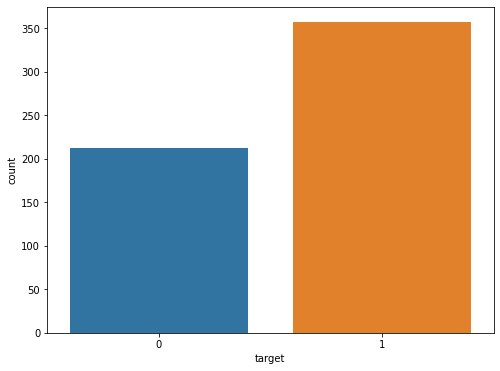

In [ ]:
plt_1 = plt.figure(figsize=(8, 6))
sns.countplot(x = 'target',data = df)

* Exploring data using heatmap

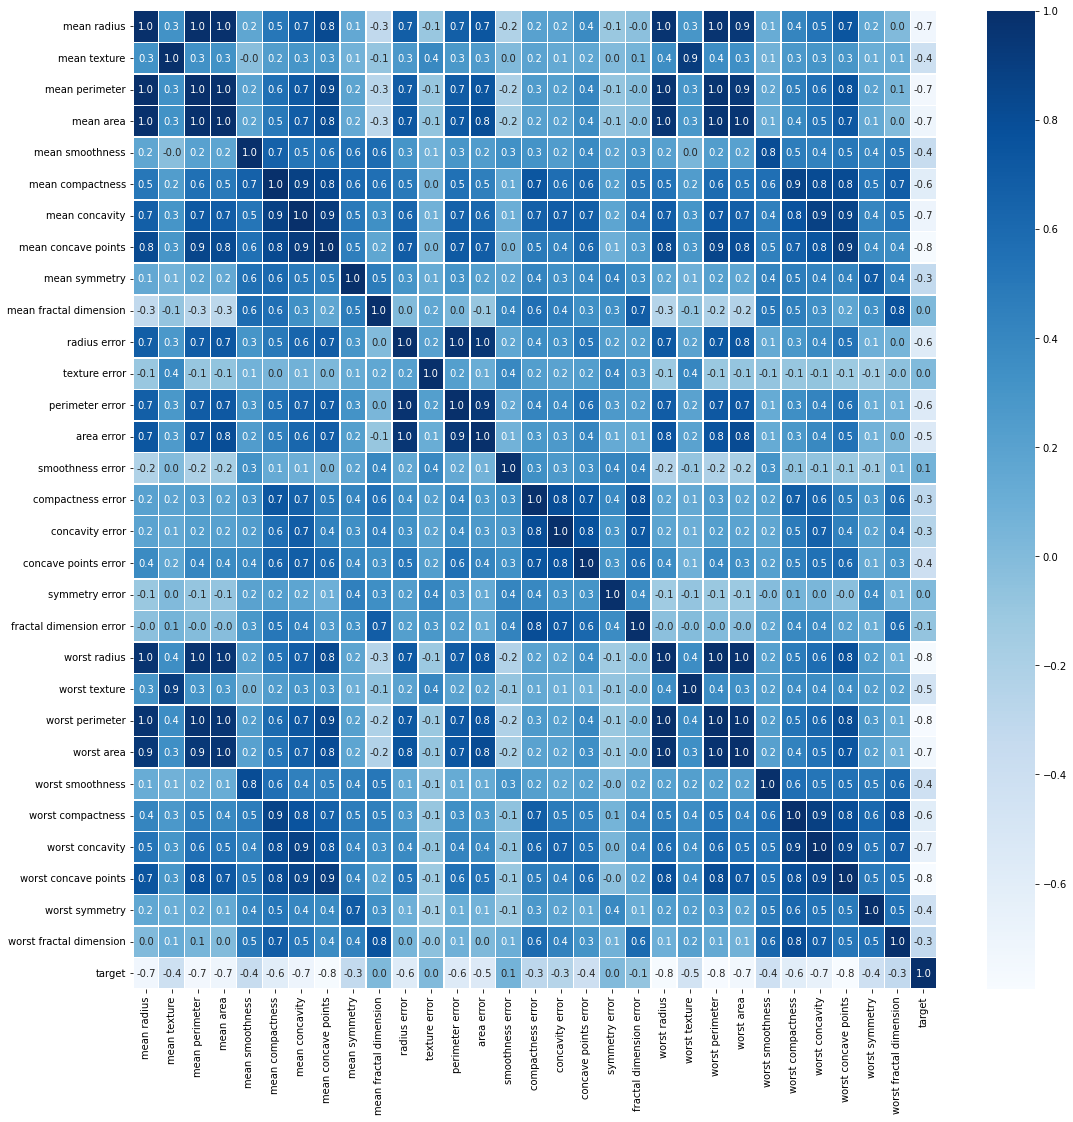

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = "Blues")

* mean radius, mean perimeter and mean area are highly corrrelated.
* radius error, perimeter error and area error are highly correlated.
* worst concativity, worst concave points and worst concave points are also highly correlated.
* Similarly we can observe high correlation among many attributes in the dataset.

In [ ]:
df.corr()['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

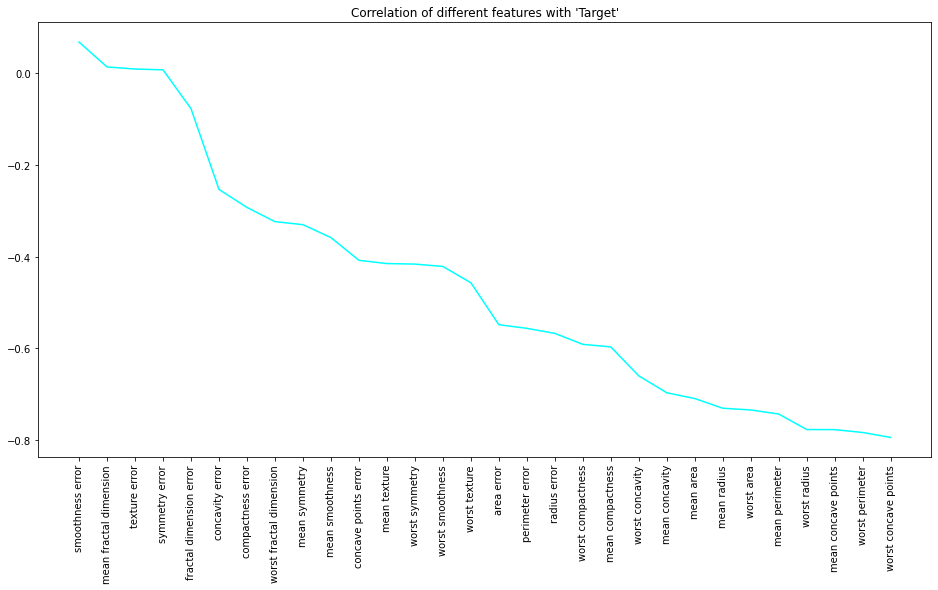

In [ ]:
#Cvorrealtion of features in descending order
print(df.corr()['target'].sort_values(ascending=False)) 
plt.figure(figsize=(16,8))
plt.plot(df.corr()['target'].sort_values(ascending=False)[1:],color="cyan") 
plt.title("Correlation of different features with 'Target'")
plt.xticks(rotation=90) 
plt.show()

* The above plot shows the correlation with the target attribute i.e. benign or malignant with various attributes in descending order. 

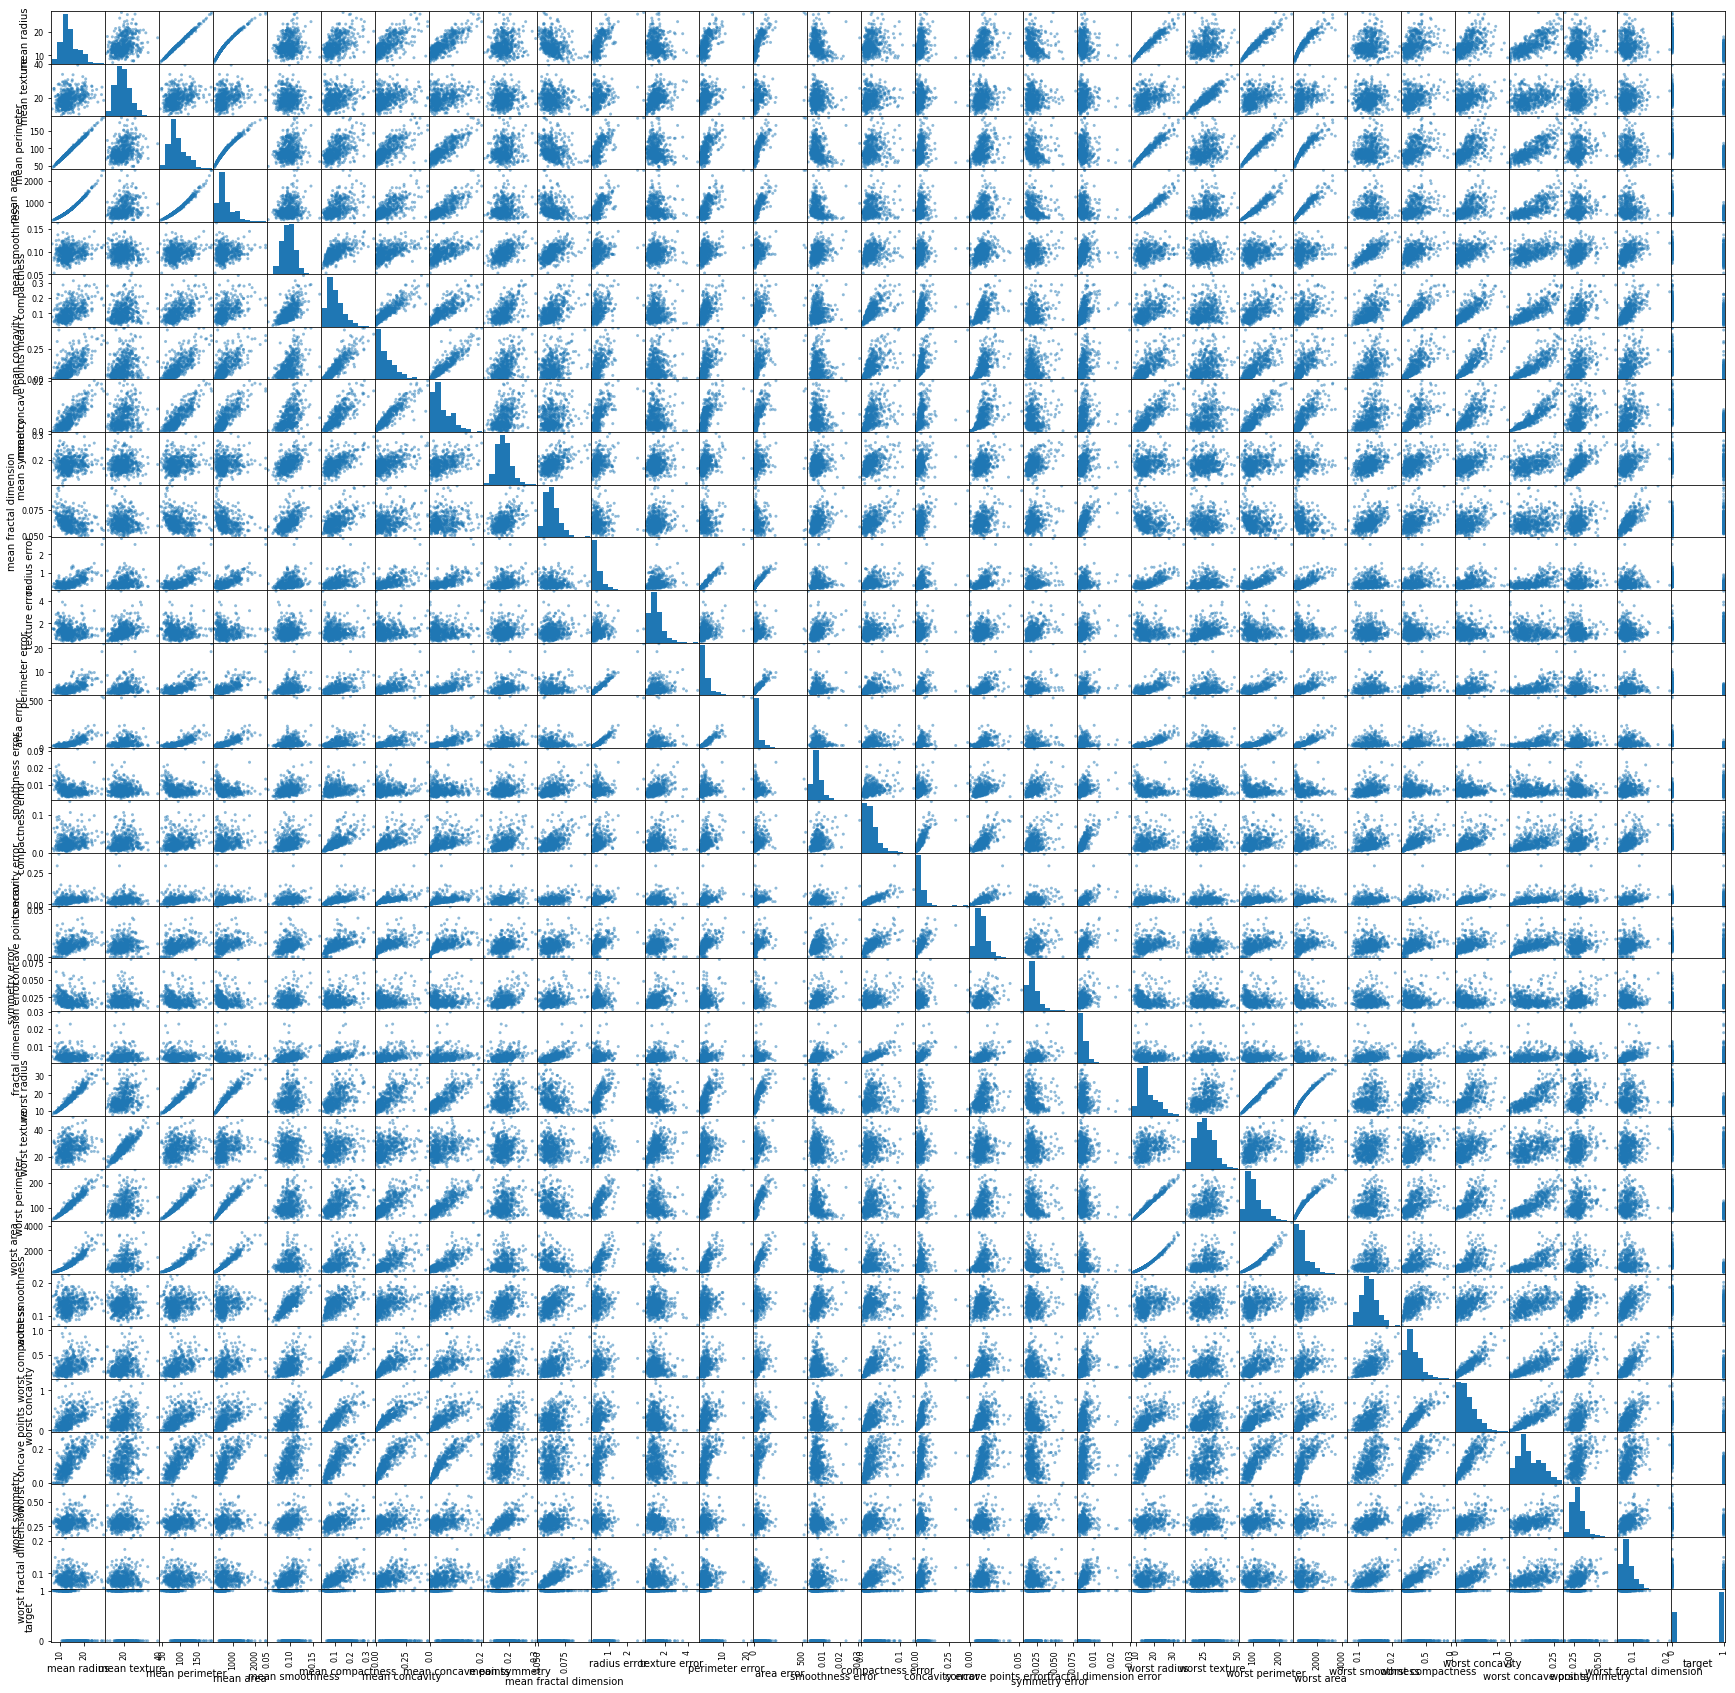

In [ ]:
# Creating scatter plot matrix
scatter_matrix(df, figsize = (30,30))
plt.xticks(rotation=90)
plt.show()

* The plot above shows the correlation among the attributes available and also depicts the distribution followed by each of the attributes.
* If an attribute depicts a heavy tailed distribution then the probability of getting outliers for that particular attribute is high.

In [ ]:
df_features = df.iloc[:,:-1]
df_target = df.iloc[:, -1]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)
X_scaled = pd.DataFrame(X_scaled)

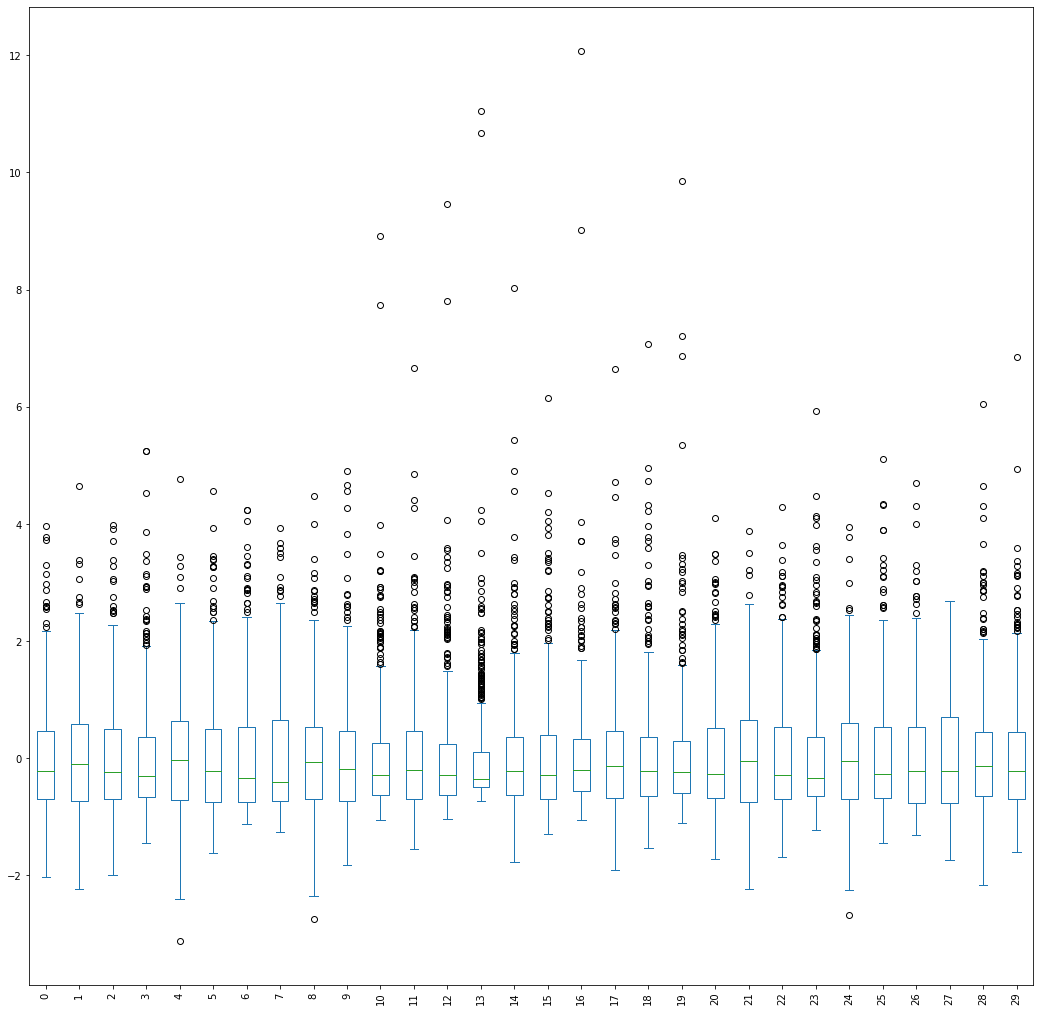

In [ ]:
X_scaled.plot(kind="box",figsize=(18,18),rot=90)

# Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
train_set_prepared = scaler.fit_transform(X_train)
test_set_prepared = scaler.transform(X_test)

# Logistic Regression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

accuracies = cross_val_score(log_reg, X_scaled, y, scoring='accuracy')

print(accuracies)

[0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]


In [ ]:
# Printing the average accuracies of the five models as created above
acc = sum(accuracies) / len(accuracies)
print(f"Average Accuracy : {acc:.3f}")

Average Accuracy : 0.981


In [ ]:
predictions =  cross_val_predict(log_reg, X_scaled, y, cv=5)

Text(0.5, 257.44, 'Predicted label')

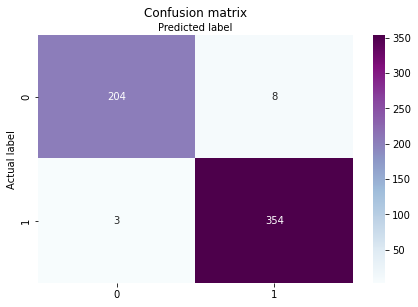

In [ ]:
# plotting the confusion_matrix

C = confusion_matrix(y,predictions)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

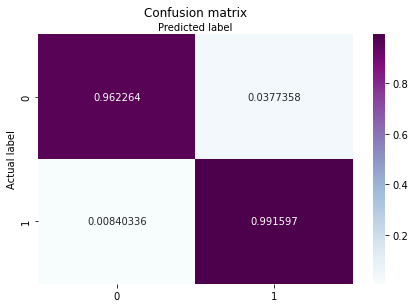

In [ ]:
# normalized confusion matrix entries by row sum

C_normalized = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# getting precision, recall and F-measure

prec_score = precision_score(y, predictions)
re_score = recall_score(y, predictions)
f_measure = f1_score(y, predictions)

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(re_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.978
Recall: 0.992
f1_score: 0.985


# KNN

In [ ]:
# Again defining param_grid dictionary with parameters names (str) as keys and lists of parameter settings to try as values for KNN regressor
param_grid = { 
            "n_neighbors" : [5, 10, 50, 100, 200],
            "weights"      : ['uniform', 'distance']
}

In [ ]:
def best_estimator(estimator, train_set, y_train):
  grid = GridSearchCV(estimator, param_grid, n_jobs = -1, cv = 5)
  grid.fit(train_set_prepared, y_train)
  print(grid.best_params_)
  return grid.best_estimator_

In [ ]:
# Performance of the KNN regressor on the original test data
KNN = KNeighborsClassifier()
best_model = best_estimator(KNN, train_set_prepared, y_train)
print(best_model.score(test_set_prepared, y_test))

{'n_neighbors': 5, 'weights': 'uniform'}
0.9473684210526315


In [ ]:
predKNN = best_model.predict(test_set_prepared)

In [ ]:
print(predKNN)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


Text(0.5, 257.44, 'Predicted label')

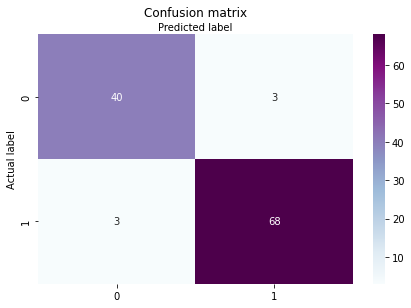

In [ ]:
cm_1 = confusion_matrix(y_test,predKNN)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm_1), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

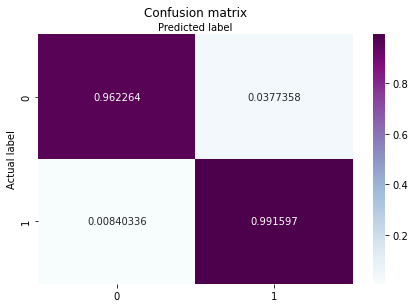

In [ ]:
# normalized confusion matrix entries by row sum

Cn_1 = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(y_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [ ]:
print(predKNN)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [ ]:
prec_score = precision_score(y_test, predKNN)
re_score = recall_score(y_test, predKNN)
f_measure = f1_score(y_test, predKNN)

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(re_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.958
Recall: 0.958
f1_score: 0.958


# SVM

In [ ]:
model_to_set = SVC()

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma' : [0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['linear', 'rbf']
            }

tuned_model = GridSearchCV(model_to_set, param_grid, cv = 5, refit = True, n_jobs = -1)
 
# fitting the model for grid search on the validation set
tuned_model.fit(train_set_prepared, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
# We'll use the best estimator found using the grid search method
final_model = tuned_model.best_estimator_  

In [ ]:
print('Train Score : {}'.format(final_model.score(train_set_prepared, y_train)))
print('Test Score : {}'.format(final_model.score(test_set_prepared, y_test)))

Train Score : 0.9824175824175824
Test Score : 0.9736842105263158


In [ ]:
pred = final_model.predict(X_test)
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


Text(0.5, 257.44, 'Predicted label')

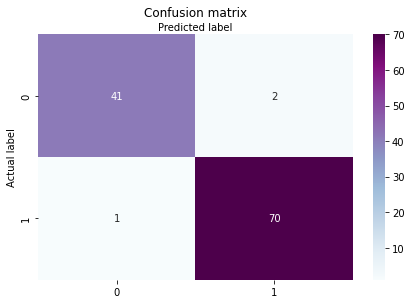

In [ ]:
C = confusion_matrix(y_test,pred)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

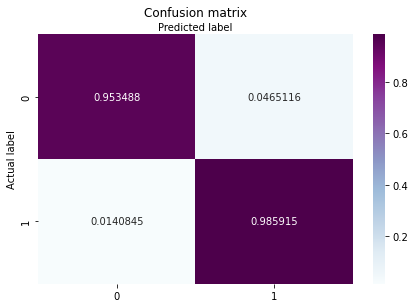

In [ ]:
# normalized confusion matrix entries by row sum

C_normalized = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
prec_score = precision_score(y_test, pred)
rec_score = recall_score(y_test, pred)
f_measure = f1_score(y_test, pred)

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(rec_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.972
Recall: 0.986
f1_score: 0.979


# Decision Tree

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
# defining parameter range
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8,10,12]
            }

tuned_model = GridSearchCV(DT, param_grid, cv = 5, refit = True, n_jobs = -1)
 
# fitting the model for grid search on the validation set
tuned_model.fit(train_set_prepared, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [ ]:
print(tuned_model.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [ ]:
# We'll use the best estimator found using the grid search method
final_model = tuned_model.best_estimator_  

In [ ]:
print(final_model)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [ ]:
print('Train Score : {}'.format(final_model.score(train_set_prepared, y_train)))
print('Test Score : {}'.format(final_model.score(test_set_prepared, y_test)))

Train Score : 0.9912087912087912
Test Score : 0.956140350877193


In [ ]:
predDT = final_model.predict(X_test)
print(predDT)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


Text(0.5, 257.44, 'Predicted label')

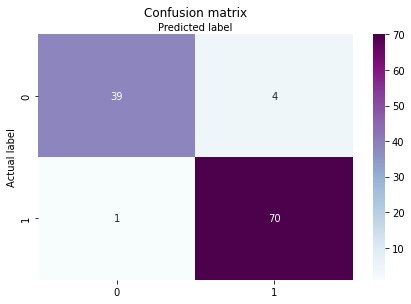

In [ ]:
C = confusion_matrix(y_test,predDT)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

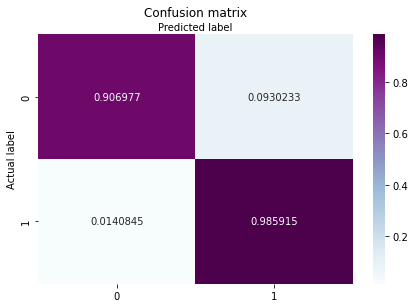

In [ ]:
# normalized confusion matrix entries by row sum

C_normalized = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
prec_score = precision_score(y_test, predDT)
re_score = recall_score(y_test, predDT)
f_measure = f1_score(y_test, predDT)

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(re_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.946
Recall: 0.986
f1_score: 0.966


# Random Forest

In [ ]:
RF = RandomForestClassifier()

In [ ]:
param_grid = { 
    'n_estimators' : [3, 10, 50, 100],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini', 'entropy'],
}

tuned_model = GridSearchCV(RF, param_grid, cv = 5, refit = True, n_jobs = -1)
 
# fitting the model for grid search on the validation set
tuned_model.fit(train_set_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [3, 10, 50, 100]})

In [ ]:
# We'll use the best estimator found using the grid search method
final_model = tuned_model.best_estimator_  

In [ ]:
print('Train Score : {}'.format(final_model.score(train_set_prepared, y_train)))
print('Test Score : {}'.format(final_model.score(test_set_prepared, y_test)))

Train Score : 1.0
Test Score : 0.9649122807017544


In [ ]:
predRF = final_model.predict(X_test)
print(predRF)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


Text(0.5, 257.44, 'Predicted label')

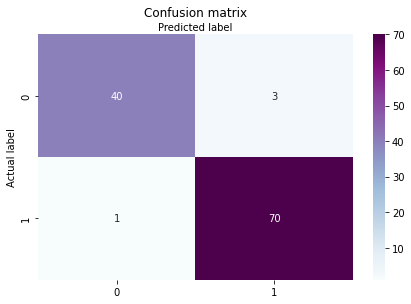

In [ ]:
C = confusion_matrix(y_test,predRF)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

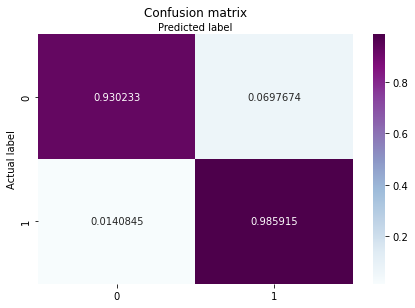

In [ ]:
# normalized confusion matrix entries by row sum

C_normalized = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C_normalized), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
prec_score = precision_score(y_test, predDT)
re_score = recall_score(y_test, predDT)
f_measure = f1_score(y_test, predDT)

print('Precision: {:.3f}'.format(prec_score))
print('Recall: {:.3f}'.format(re_score))
print('f1_score: {:.3f}'.format(f_measure))

Precision: 0.946
Recall: 0.986
f1_score: 0.966


# Final Observations :<br>


**Logistic Regression :**<br>
     Average Accuracy : 0.981<br>
     Precision: 0.978<br>Recall: 0.992<br>f1_score: 0.985

**KNN :**<br>
     Score : 0.9473684210526315<br>
     Precision: 0.958<br>Recall: 0.958<br>f1_score: 0.958

**SVM :**<br>
     Score : 0.9736842105263158<br> 
     Precision: 0.972<br>Recall: 0.986<br>f1_score: 0.979
     
**Decision Tree :**<br>
     Score : 0.956140350877193<br>
     Precision: 0.946<br>Recall: 0.986<br>f1_score: 0.966
     
**Random Forest :**<br>
     Score : 0.9649122807017544<br>
     Precision: 0.946<br>Recall: 0.986<br>f1_score: 0.966

     






* Clearly SVM and Random Forest Classifier seems to perform the best for this particular classification problem.